In [370]:
#Importar los recursos requeridos
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt 
import seaborn as sns
# Estimators
#from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import linear_model

#Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross Validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#Logistic Regression 
from sklearn.linear_model import LogisticRegression
# Descision Clasifier
from sklearn.tree import DecisionTreeClassifier
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# GaussinaNB
from sklearn.naive_bayes import GaussianNB
#Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [371]:
#Importar los datos 
Bandwidth = pd.read_csv("BandwidthReport.csv")

In [372]:
#Validar las columnas y las primeras filas del dataset. 
Bandwidth.head()

,Nombre,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,Saturacion_Mes
0,dn_Belen_d0_0_0_Bandwidth+OUT_percent,73.95,69.80,70.98,70.73,72.67,73.87,67.83,67.56,70.10,...,70.59,64.01,74.58,66.12,71.82,66.61,80.78,78.03,81.63,0
1,dn_Belen_d0_0_1_Bandwidth+OUT_percent,73.23,65.24,71.18,70.55,73.03,73.73,67.75,66.87,71.35,...,71.14,64.67,73.86,65.99,71.38,66.68,81.06,77.00,81.67,0
2,dn_Belen_d0_1_0_Bandwidth+OUT_percent,23.81,30.81,30.92,26.54,22.39,23.12,22.86,23.28,24.09,...,21.88,27.98,21.59,23.18,22.76,24.16,25.47,25.57,26.24,0
3,dn_Belen_d0_1_1_Bandwidth+OUT_percent,23.34,30.83,30.49,26.59,22.24,23.02,22.57,23.20,24.53,...,29.34,27.11,44.78,28.56,22.67,24.30,25.43,25.41,26.14,0
4,dn_Belen_d0_2_0_Bandwidth+OUT_percent,31.30,40.79,31.03,33.33,34.24,32.25,30.47,30.90,31.99,...,36.15,39.77,33.83,33.58,34.38,37.16,39.58,40.76,40.48,0


In [373]:
#Ver el Resumen de la data 
Bandwidth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 31 columns):
Nombre            9982 non-null object
2020-02-20        9815 non-null float64
2020-02-21        9815 non-null float64
2020-02-22        9815 non-null float64
2020-02-23        9815 non-null float64
2020-02-24        9815 non-null float64
2020-02-25        9815 non-null float64
2020-02-26        9815 non-null float64
2020-02-27        9815 non-null float64
2020-02-28        9979 non-null float64
2020-02-29        9843 non-null float64
2020-03-01        9843 non-null float64
2020-03-02        9843 non-null float64
2020-03-03        9843 non-null float64
2020-03-04        9843 non-null float64
2020-03-05        9843 non-null float64
2020-03-06        9843 non-null float64
2020-03-07        9843 non-null float64
2020-03-08        9843 non-null float64
2020-03-09        9846 non-null float64
2020-03-10        9846 non-null float64
2020-03-11        9846 non-null float64
2020-03-12    

In [451]:
#Reemplazar NAN con 0
Bandwidth.fillna(0)

,Nombre,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,Saturacion_Mes
0,dn_Belen_d0_0_0_Bandwidth+OUT_percent,73.95,69.80,70.98,70.73,72.67,73.87,67.83,67.56,70.10,...,70.59,64.01,74.58,66.12,71.82,66.61,80.78,78.03,81.63,0
1,dn_Belen_d0_0_1_Bandwidth+OUT_percent,73.23,65.24,71.18,70.55,73.03,73.73,67.75,66.87,71.35,...,71.14,64.67,73.86,65.99,71.38,66.68,81.06,77.00,81.67,0
2,dn_Belen_d0_1_0_Bandwidth+OUT_percent,23.81,30.81,30.92,26.54,22.39,23.12,22.86,23.28,24.09,...,21.88,27.98,21.59,23.18,22.76,24.16,25.47,25.57,26.24,0
3,dn_Belen_d0_1_1_Bandwidth+OUT_percent,23.34,30.83,30.49,26.59,22.24,23.02,22.57,23.20,24.53,...,29.34,27.11,44.78,28.56,22.67,24.30,25.43,25.41,26.14,0
4,dn_Belen_d0_2_0_Bandwidth+OUT_percent,31.30,40.79,31.03,33.33,34.24,32.25,30.47,30.90,31.99,...,36.15,39.77,33.83,33.58,34.38,37.16,39.58,40.76,40.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,up_Valle_Dorado_a_Bandwidth+OUT_percent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
9978,up_Valle_Dorado_b_Bandwidth+IN_percent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
9979,up_Valle_Dorado_b_Bandwidth+OUT_percent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
9980,up_bebedero_u0_Bandwidth+IN_percent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [464]:
#Eliminar las columnas sobrantes no necesarias para este ejercicio.
BWFinal = Bandwidth[['Nombre','2020-02-20','2020-02-21','2020-02-22','2020-02-23','2020-02-24','2020-02-25','2020-02-26','2020-02-27',
                    '2020-02-28','2020-02-29','2020-03-01','2020-03-02','2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-07',
                     '2020-03-08','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18','2020-03-19','Saturacion_Mes']]

In [465]:
BWFinal.head()
print('Summary of features sample')
BWFinal.head()

Summary of features sample


,Nombre,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,Saturacion_Mes
0,dn_Belen_d0_0_0_Bandwidth+OUT_percent,73.95,69.80,70.98,70.73,72.67,73.87,67.83,67.56,70.10,...,70.59,64.01,74.58,66.12,71.82,66.61,80.78,78.03,81.63,0
1,dn_Belen_d0_0_1_Bandwidth+OUT_percent,73.23,65.24,71.18,70.55,73.03,73.73,67.75,66.87,71.35,...,71.14,64.67,73.86,65.99,71.38,66.68,81.06,77.00,81.67,0
2,dn_Belen_d0_1_0_Bandwidth+OUT_percent,23.81,30.81,30.92,26.54,22.39,23.12,22.86,23.28,24.09,...,21.88,27.98,21.59,23.18,22.76,24.16,25.47,25.57,26.24,0
3,dn_Belen_d0_1_1_Bandwidth+OUT_percent,23.34,30.83,30.49,26.59,22.24,23.02,22.57,23.20,24.53,...,29.34,27.11,44.78,28.56,22.67,24.30,25.43,25.41,26.14,0
4,dn_Belen_d0_2_0_Bandwidth+OUT_percent,31.30,40.79,31.03,33.33,34.24,32.25,30.47,30.90,31.99,...,36.15,39.77,33.83,33.58,34.38,37.16,39.58,40.76,40.48,0


In [466]:
BWFinal.describe()

,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,Saturacion_Mes
count,9815.000000,9815.000000,9815.000000,9815.000000,9815.0000,9815.000000,9815.000000,9815.000000,9979.000000,9843.000000,...,9846.000000,9846.000000,9846.000000,9846.000000,9846.000000,9846.000000,9846.000000,9846.000000,9846.000000,9982.000000
mean,17.946908,17.321729,16.679884,18.611498,18.0832,18.033997,17.421868,17.795244,16.410498,16.790127,...,18.954659,19.061906,18.555194,18.613071,19.886983,21.193920,22.046090,21.374650,23.095963,0.009217
std,22.501428,21.753554,21.020269,23.259794,22.3617,22.366120,21.657184,22.110548,20.968687,21.030818,...,23.603435,23.686253,23.156398,23.426143,24.831011,25.936623,26.808612,26.310066,27.878183,0.095564
min,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.470000,5.990000,5.560000,6.550000,6.0800,6.070000,5.690000,6.420000,4.040000,5.100000,...,5.785000,6.385000,6.070000,5.820000,5.770000,6.410000,6.625000,6.760000,7.315000,0.000000
75%,32.475000,31.150000,30.070000,33.340000,33.0050,33.025000,31.160000,32.050000,28.965000,29.950000,...,34.827500,34.327500,33.022500,33.137500,36.570000,39.740000,41.337500,40.587500,43.760000,0.000000
max,118.720000,98.030000,111.040000,112.030000,111.8700,114.890000,108.740000,109.070000,103.780000,95.430000,...,105.390000,100.280000,117.110000,103.510000,110.990000,127.610000,127.360000,125.030000,122.320000,1.000000


In [467]:
CorrMat=BWFinal.corr()
CorrMat

,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,Saturacion_Mes
2020-02-20,1.000000,0.968470,0.965984,0.963919,0.965898,0.966594,0.961022,0.962323,0.958622,0.956929,...,0.959298,0.957532,0.958014,0.955344,0.951620,0.950171,0.956062,0.938981,0.950212,0.290879
2020-02-21,0.968470,1.000000,0.965655,0.963227,0.963309,0.962414,0.957739,0.956554,0.957486,0.954970,...,0.955974,0.953110,0.953015,0.953902,0.948502,0.946584,0.950752,0.934009,0.945566,0.287741
2020-02-22,0.965984,0.965655,1.000000,0.965134,0.964140,0.960422,0.956984,0.957998,0.952726,0.955254,...,0.954343,0.953710,0.952267,0.958756,0.951481,0.946617,0.950741,0.930632,0.944758,0.301056
2020-02-23,0.963919,0.963227,0.965134,1.000000,0.967813,0.962385,0.957007,0.957043,0.955876,0.955611,...,0.957723,0.951921,0.952510,0.957226,0.956864,0.952866,0.956553,0.944168,0.953246,0.276280
2020-02-24,0.965898,0.963309,0.964140,0.967813,1.000000,0.968684,0.965007,0.963173,0.958315,0.956774,...,0.960452,0.957976,0.956737,0.956510,0.953184,0.956672,0.958432,0.945405,0.954287,0.276101
2020-02-25,0.966594,0.962414,0.960422,0.962385,0.968684,1.000000,0.965080,0.964082,0.957264,0.955149,...,0.959057,0.958224,0.956227,0.954624,0.951281,0.953382,0.954492,0.941448,0.950685,0.283201
2020-02-26,0.961022,0.957739,0.956984,0.957007,0.965007,0.965080,1.000000,0.967048,0.957807,0.955065,...,0.960386,0.958092,0.956074,0.955029,0.952058,0.956924,0.957251,0.945465,0.954796,0.279585
2020-02-27,0.962323,0.956554,0.957998,0.957043,0.963173,0.964082,0.967048,1.000000,0.964018,0.959802,...,0.962208,0.960622,0.958383,0.956939,0.952087,0.954397,0.957609,0.940441,0.952072,0.284506
2020-02-28,0.958622,0.957486,0.952726,0.955876,0.958315,0.957264,0.957807,0.964018,1.000000,0.962537,...,0.956995,0.957618,0.955779,0.954347,0.952616,0.950354,0.952461,0.938586,0.948061,0.289538
2020-02-29,0.956929,0.954970,0.955254,0.955611,0.956774,0.955149,0.955065,0.959802,0.962537,1.000000,...,0.955067,0.954948,0.955261,0.956433,0.954190,0.949313,0.951592,0.936471,0.949422,0.282591


<function matplotlib.pyplot.plotting()>

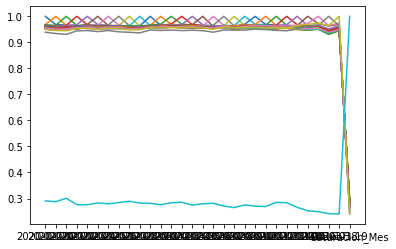

In [456]:
plt.plot(CorrMat)
plt.plotting

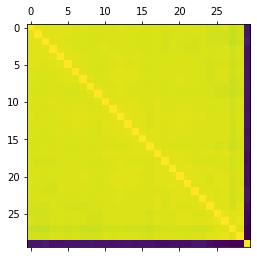

In [457]:
plt.matshow(CorrMat)

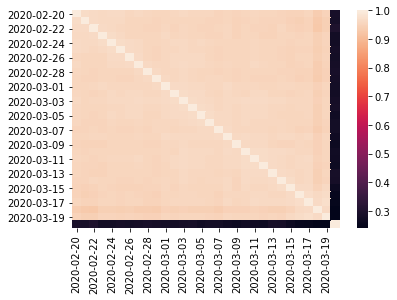

In [458]:
sns.heatmap(CorrMat)

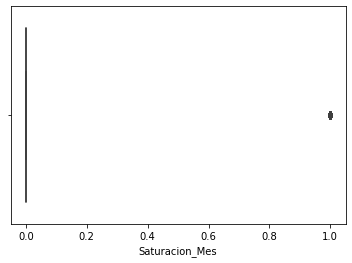

In [459]:
sns.boxplot(BWFinal['Saturacion_Mes'])

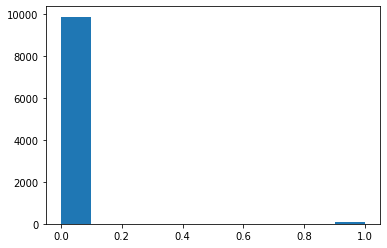

In [460]:
plt.hist(BWFinal['Saturacion_Mes'])
plt.show()

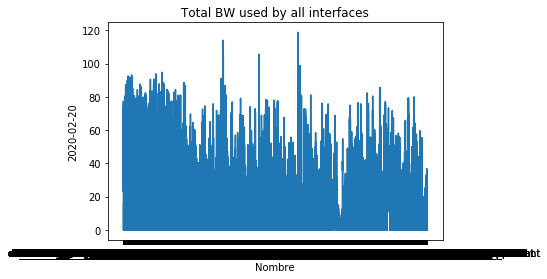

In [383]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-02-20",
                       data=BWFinal).set_title('Total BW used by all interfaces')
plt.show()

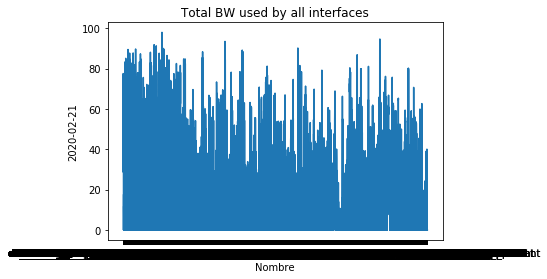

In [184]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-02-21",
                       data=BWFinal).set_title('Total BW used by all interfaces')
plt.show()

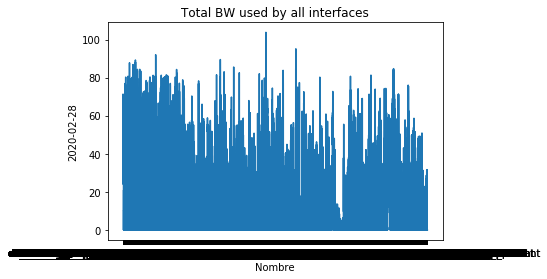

In [185]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-02-28",
                       data=BWFinal).set_title('Total BW used by all interfaces')
plt.show()

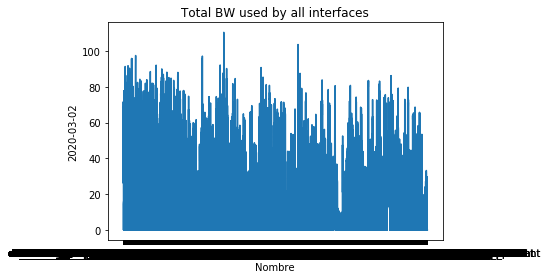

In [190]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-02",
                       data=BWFinal).set_title('Total BW used by all interfaces')
plt.show()

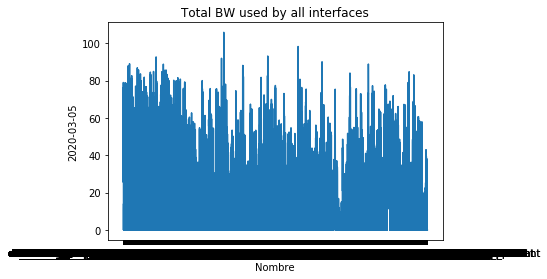

In [191]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-05",
                       data=BWFinal).set_title('Total BW used by all interfaces')
plt.show()

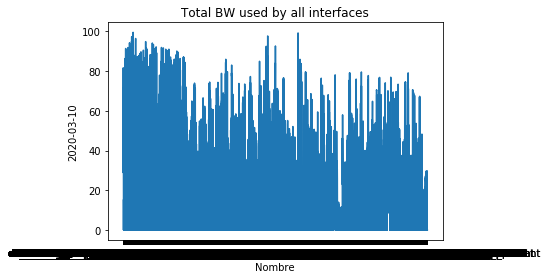

In [192]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-10",
                       data=BWFinal).set_title('Total BW used by all interfaces')
plt.show()

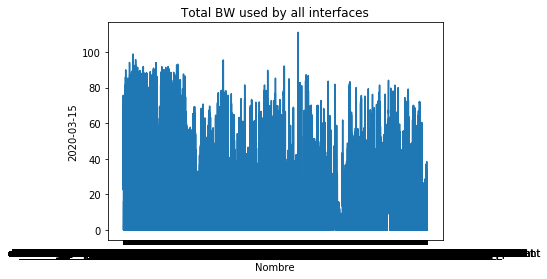

In [193]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-15",
                       data=BWFinal).set_title('Total BW used by all interfaces')
plt.show()

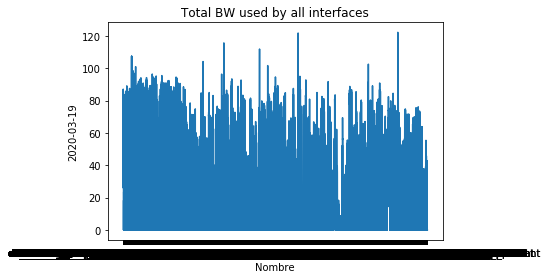

In [194]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-19",
                       data=BWFinal).set_title('Total BW used by all interfaces')
plt.show()

In [161]:
#Crear agrupación de interfaces de acuerdo a si están saturadas o no
saturacion = BWFinal.groupby('Saturacion_Mes')
saturacion.first()

,Nombre,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19
Saturacion_Mes,,,,,,,,,,,,,,,,,,,,,
0,dn_Belen_d0_0_0_Bandwidth+OUT_percent,73.95,69.80,70.98,70.73,72.67,73.87,67.83,67.56,70.10,...,71.38,70.59,64.01,74.58,66.12,71.82,66.61,80.78,78.03,81.63
1,dn_Cartago_d0_3_0_Bandwidth+OUT_percent,75.80,83.44,80.80,83.69,69.28,70.68,72.44,81.08,76.59,...,86.36,86.09,90.37,81.12,84.96,80.62,88.97,91.27,88.06,83.83


In [169]:
# Obtener la lista de las interfaces saturadas para el periodo
saturadas=saturacion.get_group(1)
saturadas

,Nombre,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19
71,dn_Cartago_d0_3_0_Bandwidth+OUT_percent,75.80,83.44,80.80,83.69,69.28,70.68,72.44,81.08,76.59,...,86.36,86.09,90.37,81.12,84.96,80.62,88.97,91.27,88.06,83.83
73,dn_Cartago_d0_3_1_Bandwidth+OUT_percent,75.41,82.42,80.71,84.42,71.74,71.54,72.30,81.14,76.98,...,81.93,82.08,91.24,81.35,84.55,81.46,89.25,91.22,88.04,83.93
87,dn_Cartago_d0_7_0_Bandwidth+OUT_percent,87.00,82.38,81.41,82.84,78.58,80.89,78.48,82.42,79.32,...,91.38,80.97,85.52,91.46,82.89,89.23,90.40,86.66,87.69,85.78
89,dn_Cartago_d0_7_1_Bandwidth+OUT_percent,87.08,85.14,82.70,83.16,78.51,82.65,80.22,83.05,80.27,...,90.88,81.71,86.50,89.50,81.65,89.91,91.17,86.88,87.57,85.45
91,dn_Cartago_d1_0_0_Bandwidth+OUT_percent,79.26,81.27,78.74,84.29,78.88,78.64,76.76,80.55,75.62,...,84.74,81.79,79.81,84.50,80.68,80.47,82.95,78.82,79.47,78.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,up_GRTA01_b_Bandwidth+IN_percent,77.92,76.74,106.35,108.34,100.73,70.10,94.75,109.07,103.78,...,97.69,99.51,90.94,82.81,103.51,89.65,108.11,85.65,107.59,101.74
5663,up_HEST01D_a_Bandwidth+IN_percent,107.83,76.82,102.80,112.03,103.76,111.24,62.42,76.32,84.72,...,73.72,86.46,90.12,105.51,99.92,89.91,98.69,122.68,122.29,115.25
5665,up_HEST01D_b_Bandwidth+IN_percent,111.34,85.06,105.33,111.95,108.73,109.66,61.04,78.22,79.05,...,75.52,91.43,93.74,111.95,100.04,92.00,101.70,116.79,26.62,86.73
5667,up_HEST01D_c_Bandwidth+IN_percent,117.53,90.25,108.96,111.31,111.87,113.56,59.95,99.88,95.12,...,99.21,105.39,89.21,117.11,98.14,103.74,103.75,115.06,105.81,117.42


In [174]:
saturadas.head()
#saturadas.tail()

,Nombre,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19
71,dn_Cartago_d0_3_0_Bandwidth+OUT_percent,75.80,83.44,80.80,83.69,69.28,70.68,72.44,81.08,76.59,...,86.36,86.09,90.37,81.12,84.96,80.62,88.97,91.27,88.06,83.83
73,dn_Cartago_d0_3_1_Bandwidth+OUT_percent,75.41,82.42,80.71,84.42,71.74,71.54,72.30,81.14,76.98,...,81.93,82.08,91.24,81.35,84.55,81.46,89.25,91.22,88.04,83.93
87,dn_Cartago_d0_7_0_Bandwidth+OUT_percent,87.00,82.38,81.41,82.84,78.58,80.89,78.48,82.42,79.32,...,91.38,80.97,85.52,91.46,82.89,89.23,90.40,86.66,87.69,85.78
89,dn_Cartago_d0_7_1_Bandwidth+OUT_percent,87.08,85.14,82.70,83.16,78.51,82.65,80.22,83.05,80.27,...,90.88,81.71,86.50,89.50,81.65,89.91,91.17,86.88,87.57,85.45
91,dn_Cartago_d1_0_0_Bandwidth+OUT_percent,79.26,81.27,78.74,84.29,78.88,78.64,76.76,80.55,75.62,...,84.74,81.79,79.81,84.50,80.68,80.47,82.95,78.82,79.47,78.72


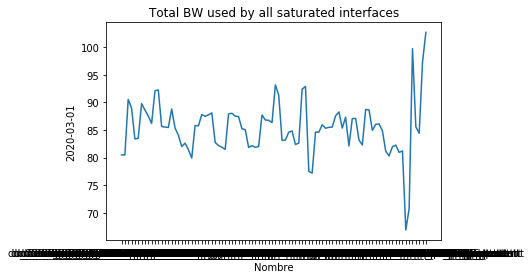

In [173]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-01",
                       data=saturadas).set_title('Percentage BW used by all saturated interfaces')
plt.show()

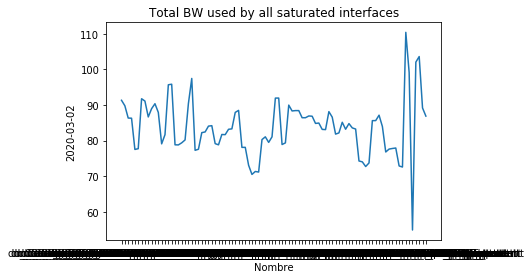

In [176]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-02",
                       data=saturadas).set_title('Percentage BW used by all saturated interfaces')
plt.show()

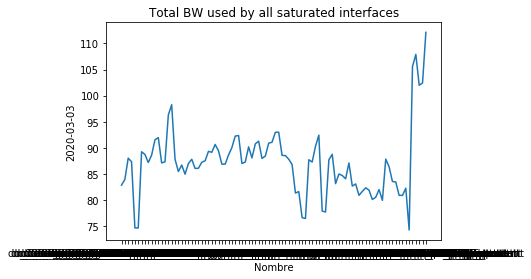

In [177]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-03",
                       data=saturadas).set_title('Percentage BW used by all saturated interfaces')
plt.show()

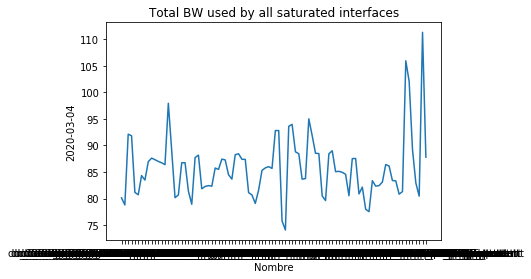

In [178]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-04",
                       data=saturadas).set_title('Percentage BW used by all saturated interfaces')
plt.show()

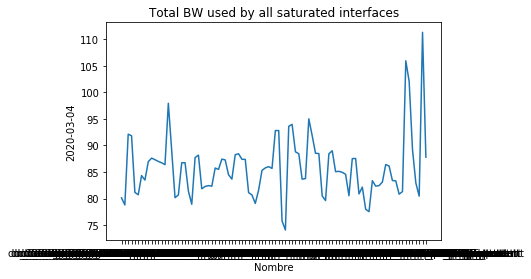

In [181]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-04",
                       data=saturadas).set_title('Percentage BW used by all saturated interfaces')
plt.show()

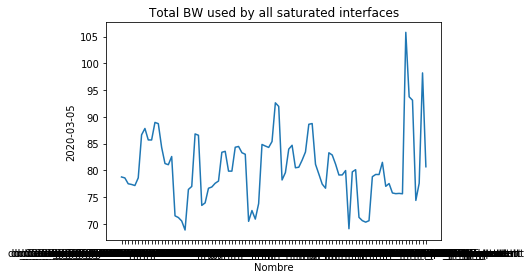

In [182]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-05",
                       data=saturadas).set_title('Percentage BW used by all saturated interfaces')
plt.show()

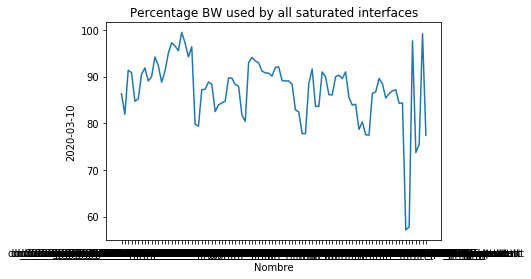

In [189]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-10",
                       data=saturadas).set_title('Percentage BW used by all saturated interfaces')
plt.show()

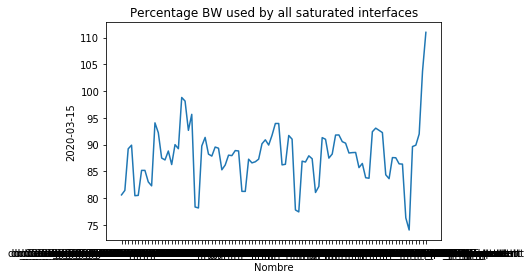

In [188]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-15",
                       data=saturadas).set_title('Percentage BW used by all saturated interfaces')
plt.show()

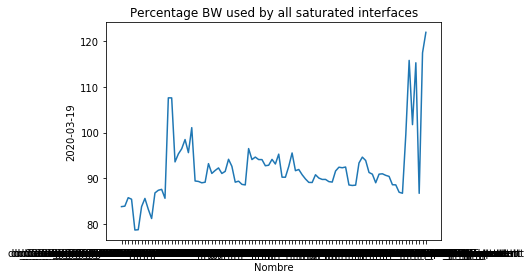

In [187]:
bw_chart= sns.lineplot(x="Nombre",
                       y="2020-03-19",
                       data=saturadas).set_title('Percentage BW used by all saturated interfaces')
plt.show()

In [195]:
#df.plot(x="X", y=["A", "B", "C"], kind="bar")
#BWFinal.plot(x="Nombre", y=["2020-02-21","2020-02-22","2020-02-22","2020-02-23"],kind="bar")
#bw_chart= sns.barplot(x="Nombre",
#                       y=["2020-02-21","2020-02-22","2020-02-22","2020-02-23"],
#                       data=BWFinal).set_title('Test')
#plt.show()

#bw_chart= sns.lineplot(x="Nombre",
#                       y="2020-02-21",
#                       data=BWFinal[['dn_Belen_d0_0_0_Bandwidth+OUT_percent'],['2020-02-21']]).set_title('Test')
#plt.show()

In [468]:
#dependent variable
depVar = BWFinal['Saturacion_Mes']

In [469]:
features=BWFinal.iloc[:,1:31]
print('Summary of features sample')
features.head()

Summary of features sample


,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,Saturacion_Mes
0,73.95,69.80,70.98,70.73,72.67,73.87,67.83,67.56,70.10,65.16,...,70.59,64.01,74.58,66.12,71.82,66.61,80.78,78.03,81.63,0
1,73.23,65.24,71.18,70.55,73.03,73.73,67.75,66.87,71.35,65.30,...,71.14,64.67,73.86,65.99,71.38,66.68,81.06,77.00,81.67,0
2,23.81,30.81,30.92,26.54,22.39,23.12,22.86,23.28,24.09,23.12,...,21.88,27.98,21.59,23.18,22.76,24.16,25.47,25.57,26.24,0
3,23.34,30.83,30.49,26.59,22.24,23.02,22.57,23.20,24.53,22.82,...,29.34,27.11,44.78,28.56,22.67,24.30,25.43,25.41,26.14,0
4,31.30,40.79,31.03,33.33,34.24,32.25,30.47,30.90,31.99,29.26,...,36.15,39.77,33.83,33.58,34.38,37.16,39.58,40.76,40.48,0


In [470]:
#dependent variable
depVar = features['Saturacion_Mes']

In [471]:
X_train = (features[: 1000])
X_train.head()

,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,Saturacion_Mes
0,73.95,69.80,70.98,70.73,72.67,73.87,67.83,67.56,70.10,65.16,...,70.59,64.01,74.58,66.12,71.82,66.61,80.78,78.03,81.63,0
1,73.23,65.24,71.18,70.55,73.03,73.73,67.75,66.87,71.35,65.30,...,71.14,64.67,73.86,65.99,71.38,66.68,81.06,77.00,81.67,0
2,23.81,30.81,30.92,26.54,22.39,23.12,22.86,23.28,24.09,23.12,...,21.88,27.98,21.59,23.18,22.76,24.16,25.47,25.57,26.24,0
3,23.34,30.83,30.49,26.59,22.24,23.02,22.57,23.20,24.53,22.82,...,29.34,27.11,44.78,28.56,22.67,24.30,25.43,25.41,26.14,0
4,31.30,40.79,31.03,33.33,34.24,32.25,30.47,30.90,31.99,29.26,...,36.15,39.77,33.83,33.58,34.38,37.16,39.58,40.76,40.48,0


In [472]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    0
1    0
2    0
3    0
4    0
Name: Saturacion_Mes, dtype: int64

In [473]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
      2020-02-20  2020-02-21  2020-02-22  2020-02-23  2020-02-24  2020-02-25  \
9882       10.92        8.62        8.15        8.14        6.04        9.79   
9883        0.00        0.00        0.00        0.00        0.00        0.00   
9884       11.41        7.59        6.70        7.41        5.41        7.12   
9885        0.00        0.00        0.00        0.00        0.00        0.00   
9886       10.67        8.97        6.59        8.09        6.38        7.85   

      2020-02-26  2020-02-27  2020-02-28  2020-02-29  ...  2020-03-11  \
9882        9.52        9.55        8.35       13.18  ...        5.66   
9883        0.00        0.00        0.00        0.00  ...        0.00   
9884        7.80        8.02        8.34       12.57  ...        5.55   
9885        0.00        0.00        0.00        0.00  ...        0.00   
9886        8.81        8.64        8.47       13.98  ...        6.28   

      2020-03-12  

In [474]:
#Ground Truth (y_test) 
y_test = depVar[-1000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1000


8982    0
8983    0
8984    0
8985    0
8986    0
Name: Saturacion_Mes, dtype: int64

In [392]:
#Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [393]:
X_train.shape, X_test.shape

((750, 30), (250, 30))

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 30), (188, 30))

In [395]:
#Models
modelSVC = SVC()
modelRFC = RandomForestClassifier()
modelLR = LinearRegression()

In [396]:
#dependent variable
print(depVar)

0       0
1       0
2       0
3       0
4       0
       ..
9977    0
9978    0
9979    0
9980    0
9981    0
Name: Saturacion_Mes, Length: 9982, dtype: int64


In [397]:
#Random Forest
modelRFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [398]:
#SVN 
modelSVC.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [399]:
# Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [400]:
# Validar los rendimientos del modelo RF
print(cross_val_score(modelRFC, X_train, y_train)) 

[1.         1.         1.         1.         0.99107143]


In [401]:
#Validar SVC
print(cross_val_score(modelSVC, X_train, y_train))

[1.         0.97345133 0.98214286 0.99107143 0.99107143]


In [402]:
#Validar LR
print(cross_val_score(modelLR, X_train, y_train))

[1. 1. 1. 1. 1.]


In [403]:
modelSVC.score(X_train,y_train)

0.9893238434163701

In [404]:
modelRFC.score(X_train,y_train)

1.0

In [405]:
modelLR.score(X_train,y_train)

1.0

In [406]:
#Model Fitting SVC
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)

[1.         0.97345133 0.98214286 0.99107143 0.99107143]


0.9893238434163701

In [407]:
#LogisticRegression
ModelLogreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [408]:
ModelLogreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [409]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(ModelLogreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(ModelLogreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [410]:
print(cross_val_score(ModelLogreg, X_train, y_train))
ModelLogreg.score(X_train,y_train)

[1.         1.         1.         0.99107143 1.        ]


1.0

In [411]:
#DecisionTreeClassifier
ModelClf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(ModelClf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(ModelClf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [412]:
print(cross_val_score(ModelClf, X_train, y_train))
ModelClf.score(X_train,y_train)

[1. 1. 1. 1. 1.]


1.0

In [425]:
#KNeighborsClassifier
Modelknn = KNeighborsClassifier()
Modelknn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(Modelknn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(Modelknn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.98


In [426]:
print(cross_val_score(Modelknn, X_train, y_train))
Modelknn.score(X_train,y_train)

[1.         0.99115044 0.98214286 1.         0.99107143]


0.99644128113879

In [427]:
#Linear Discriminant Analysis
ModelLda = LinearDiscriminantAnalysis()
ModelLda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(ModelLda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(ModelLda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.96
Accuracy of LDA classifier on test set: 0.93


In [428]:
print(cross_val_score(ModelLda, X_train, y_train))
ModelLda.score(X_train,y_train)

[0.92035398 0.98230088 0.94642857 0.98214286 0.95535714]


0.9644128113879004

In [429]:
# GaussinaNB
Modelgnb = GaussianNB()
Modelgnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(Modelgnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(Modelgnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


In [430]:
print(cross_val_score(Modelgnb, X_train, y_train))
Modelgnb.score(X_train,y_train)

[1. 1. 1. 1. 1.]


1.0

In [439]:
predictions = Modelknn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(predictions)

[[176   1]
 [  3   8]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       177
           1       0.89      0.73      0.80        11

    accuracy                           0.98       188
   macro avg       0.94      0.86      0.89       188
weighted avg       0.98      0.98      0.98       188

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [440]:
#Obtener RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print(rmse)

0.14586499149789456


In [441]:
predRsquared = r2_score(y_test,predictions)
print(predRsquared)

0.613764766307139


In [446]:
#Make Predictions on Test Data
predictions = Modelknn.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.614
RMSE: 0.146


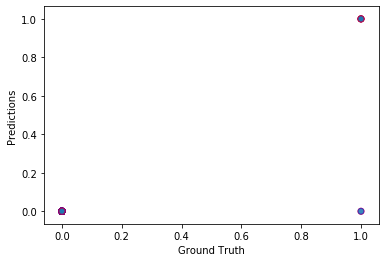

In [444]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

(array([180.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

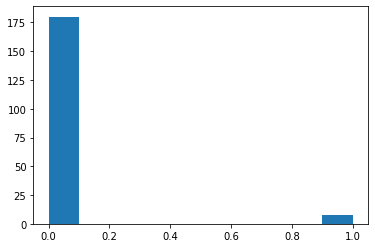

In [437]:
plt.hist(predictions)

In [475]:
#Obtener el total de las muestras para aplicar el modelo
BWTotal = (features[: 9982])

In [476]:
#Asignar la variable dependiente a toda la muestra
y_Total = depVar[: 9982]

In [482]:
#Reemplazar NANs en la totalidad de las muestras
BWTotal=BWTotal.fillna(0)

In [483]:
#Validar contra el total de las muestras
predictionsFinal = Modelknn.predict(BWTotal)
print(confusion_matrix(y_Total, predictionsFinal))
print(classification_report(y_Total, predictionsFinal))
print(predictionsFinal)

[[9883    7]
 [  13   79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9890
           1       0.92      0.86      0.89        92

    accuracy                           1.00      9982
   macro avg       0.96      0.93      0.94      9982
weighted avg       1.00      1.00      1.00      9982

[0 0 0 ... 0 0 0]


In [484]:
BWTotal.head()

,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,Saturacion_Mes
0,73.95,69.80,70.98,70.73,72.67,73.87,67.83,67.56,70.10,65.16,...,70.59,64.01,74.58,66.12,71.82,66.61,80.78,78.03,81.63,0
1,73.23,65.24,71.18,70.55,73.03,73.73,67.75,66.87,71.35,65.30,...,71.14,64.67,73.86,65.99,71.38,66.68,81.06,77.00,81.67,0
2,23.81,30.81,30.92,26.54,22.39,23.12,22.86,23.28,24.09,23.12,...,21.88,27.98,21.59,23.18,22.76,24.16,25.47,25.57,26.24,0
3,23.34,30.83,30.49,26.59,22.24,23.02,22.57,23.20,24.53,22.82,...,29.34,27.11,44.78,28.56,22.67,24.30,25.43,25.41,26.14,0
4,31.30,40.79,31.03,33.33,34.24,32.25,30.47,30.90,31.99,29.26,...,36.15,39.77,33.83,33.58,34.38,37.16,39.58,40.76,40.48,0


In [488]:
BWTotal['Nombre']=Bandwidth['Nombre']
BWTotal['predictions']=predictionsFinal

In [489]:
BWTotal.head()

,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,Saturacion_Mes,predictions,Nombre
0,73.95,69.80,70.98,70.73,72.67,73.87,67.83,67.56,70.10,65.16,...,74.58,66.12,71.82,66.61,80.78,78.03,81.63,0,0,dn_Belen_d0_0_0_Bandwidth+OUT_percent
1,73.23,65.24,71.18,70.55,73.03,73.73,67.75,66.87,71.35,65.30,...,73.86,65.99,71.38,66.68,81.06,77.00,81.67,0,0,dn_Belen_d0_0_1_Bandwidth+OUT_percent
2,23.81,30.81,30.92,26.54,22.39,23.12,22.86,23.28,24.09,23.12,...,21.59,23.18,22.76,24.16,25.47,25.57,26.24,0,0,dn_Belen_d0_1_0_Bandwidth+OUT_percent
3,23.34,30.83,30.49,26.59,22.24,23.02,22.57,23.20,24.53,22.82,...,44.78,28.56,22.67,24.30,25.43,25.41,26.14,0,0,dn_Belen_d0_1_1_Bandwidth+OUT_percent
4,31.30,40.79,31.03,33.33,34.24,32.25,30.47,30.90,31.99,29.26,...,33.83,33.58,34.38,37.16,39.58,40.76,40.48,0,0,dn_Belen_d0_2_0_Bandwidth+OUT_percent


In [491]:
BWTotal.to_csv(r"BWFilaPred.csv",index=False)